In [1]:
import collections, math, os, sys

from fishanno import QuantiusAnnotation, SpotAnnotationAnalysis,  clus, util

from sklearn.neighbors import KDTree
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Recall vs. SNR
Recall vs. SNR. Each marker represents one SNR bin.

In [2]:
snr_list = [3,5,7,9,11]
clustering_params = ['AffinityPropagation', -350]
correctness_threshold = 4
declumping_params = ['KMeans', 2]
height = 300
cwd = os.getcwd()

## spot size = 0.5
original and inverted images

In [3]:
json_paths = [cwd + '/datasets/anno/sz_0.5_snr_1_3_5_7_9_11.json',
              cwd + '/datasets/anno/sz_0.5_snr_1_3_5_7_9_11_inv.json']

num_spots_detected_list = [0]*len(snr_list)
num_spots_total_list = [0]*len(snr_list)
detection_lists = []

# for each file
for json_path in json_paths:
    detection_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]

        if(json_path == json_paths[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_spot_img.png'
            img_path = cwd + '/datasets/spot_images/og/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_spot_img_inv.png'
            img_path = cwd + '/datasets/spot_images/inv/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_0.5_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = clus.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = clus.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = clus.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = clus.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = clus.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        """ Count up num_spots_detected, num_spots_total at each SNR """
        result_points = result_clusters.loc[:, ['centroid_x', 'centroid_y']].as_matrix()
        result_kdt = KDTree(result_points, leaf_size=2, metric='euclidean')
        
        ref_df = pd.read_csv(csv_path)
        ref_points = ref_df.loc[:, ['col', 'row']].as_matrix()
        ref_points_snr = ref_df.loc[:, ['snr']].as_matrix()

        # for each bin
        for bin_midpoint in snr_list:
            num_total = 0
            num_detected = 0

            # for each spot in the image
            for ref_point, ref_snr in zip(ref_points, ref_points_snr):
                ref_snr = ref_snr[0]

                # if the spot's is in the SNR bin
                if (ref_snr > bin_midpoint-1) and (ref_snr <= bin_midpoint+1):
                    num_total += 1
                    dist, ind = result_kdt.query([[ref_point[0], height-ref_point[1]]], k=1)
                    if dist[0][0] <= correctness_threshold:
                        num_detected += 1
            num_spots_total_list[index] += num_total    
            num_spots_detected_list[index] += num_detected

    detection_list = [d/t for d, t in zip(num_spots_detected_list, num_spots_total_list)]
    detection_lists.append(detection_list)
    
detection_lists_0_5 = detection_lists


../../../../FISH-annotation/fishanno/util.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  occasions = np.unique(df.loc[:, ['time_when_completed']].as_matrix())			# get the list of occasions
../../../../FISH-annotation/fishanno/util.py:88: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  one_occasion_array = one_occasion_df.loc[:, ['x', 'y', 'timestamp', 'worker_id']].as_matrix()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [4]:
json_paths = [cwd + '/datasets/anno/sz_1_snr_1_3_5_7_9_11.json',
              cwd + '/datasets/anno/sz_1_snr_1_3_5_7_9_11_inv.json']

num_spots_detected_list = [0]*len(snr_list)
num_spots_total_list = [0]*len(snr_list)
detection_lists = []

# for each file
for json_path in json_paths:
    detection_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]
        
        if(json_path == json_paths[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_spot_img.png'
            img_path = cwd + '/datasets/spot_images/og/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_spot_img_inv.png'
            img_path = cwd + '/datasets/spot_images/inv/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_spot_sigma_1_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = clus.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = clus.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = clus.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = clus.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = clus.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        """ Count up num_spots_detected, num_spots_total at each SNR """
        result_points = result_clusters.loc[:, ['centroid_x', 'centroid_y']].as_matrix()
        result_kdt = KDTree(result_points, leaf_size=2, metric='euclidean')

        ref_df = pd.read_csv(csv_path)
        ref_points = ref_df.loc[:, ['col', 'row']].as_matrix()
        ref_points_snr = ref_df.loc[:, ['snr']].as_matrix()

        # for each bin
        for bin_midpoint in snr_list:
            num_total = 0
            num_detected = 0

            # for each spot in the image
            for ref_point, ref_snr in zip(ref_points, ref_points_snr):
                ref_snr = ref_snr[0]

                # if the spot's is in the SNR bin
                if (ref_snr > bin_midpoint-1) and (ref_snr <= bin_midpoint+1):
                    num_total += 1
                    dist, ind = result_kdt.query([[ref_point[0], height-ref_point[1]]], k=1)
                    if dist[0][0] <= correctness_threshold:
                        num_detected += 1
            num_spots_total_list[index] += num_total    
            num_spots_detected_list[index] += num_detected

    detection_list = [d/t for d, t in zip(num_spots_detected_list, num_spots_total_list)]
    detection_lists.append(detection_list)

detection_lists_1_0 = detection_lists


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## spot size = 1.75
original and inverted images

In [5]:
json_paths_1 = [cwd + '/datasets/anno/sz_1.75_snr_1_3.json',
               cwd + '/datasets/anno/sz_1.75_snr_1_3_inv.json']

num_spots_detected_list_1 = [0]
num_spots_total_list_1 = [0]
detection_lists_1 = []
snr_list = [3]

# for each file
for json_path in json_paths_1:
    detection_list = []
    # for each image
    for index in range(len(snr_list)):
        snr = snr_list[index]

        if(json_path == json_paths_1[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img.png'
            img_path = cwd + '/datasets/spot_images/og/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img_inv.png'
            img_path = cwd + '/datasets/spot_images/inv/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = clus.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = clus.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = clus.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = clus.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = clus.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        """ Count up num_spots_detected, num_spots_total at each SNR """
        result_points = result_clusters.loc[:, ['centroid_x', 'centroid_y']].as_matrix()
        result_kdt = KDTree(result_points, leaf_size=2, metric='euclidean')

        ref_df = pd.read_csv(csv_path)
        ref_points = ref_df.loc[:, ['col', 'row']].as_matrix()
        ref_points_snr = ref_df.loc[:, ['snr']].as_matrix()

        # for each bin
        for bin_midpoint in snr_list:
            num_total = 0
            num_detected = 0

            # for each spot in the image
            for ref_point, ref_snr in zip(ref_points, ref_points_snr):
                ref_snr = ref_snr[0]

                # if the spot's is in the SNR bin
                if (ref_snr > bin_midpoint-1) and (ref_snr <= bin_midpoint+1):
                    num_total += 1
                    dist, ind = result_kdt.query([[ref_point[0], height-ref_point[1]]], k=1)
                    if dist[0][0] <= correctness_threshold:
                        num_detected += 1
            num_spots_total_list_1[index] += num_total    
            num_spots_detected_list_1[index] += num_detected

    detection_list = [d/t for d, t in zip(num_spots_detected_list_1, num_spots_total_list_1)]
    detection_lists_1.append(detection_list)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
json_paths_2 = [cwd + '/datasets/anno/sz_1.75_snr_5_7_9_11.json', 
               cwd + '/datasets/anno/sz_1.75_snr_5_7_9_11_inv.json']

num_spots_detected_list_2 = [0]*len(snr_list)
num_spots_total_list_2 = [0]*len(snr_list)

detection_lists_2 = []
snr_list = [5, 7, 9, 11]    

# for each file
for json_path in json_paths_2:
    detection_list = []
    # for each image
    for index in range(len(snr_list)):
        
        snr = snr_list[index]

        if(json_path == json_paths_2[0]):
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img.png'
            img_path = cwd + '/datasets/spot_images/og/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        else:
            img_name = 'snr_' + str(snr) + '_1_numspots_50_spot_img_inv.png'
            img_path = cwd + '/datasets/spot_images/inv/' + img_name
            csv_path = cwd + '/datasets/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        
        """ Get cluster centroids """
        qa = QuantiusAnnotation(json_path, img_name)
        anno_all = qa.df()
        sa = SpotAnnotationAnalysis(qa)

        clusters = sa.get_clusters(anno_all, clustering_params)
        cluster_size_threshold = clus.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = clus.sort_clusters_by_size(clusters, cluster_size_threshold)
        clumpiness_threshold = clus.get_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = clus.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = clus.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)

        """ Count up num_spots_detected, num_spots_total at each SNR """
        result_points = result_clusters.loc[:, ['centroid_x', 'centroid_y']].as_matrix()
        result_kdt = KDTree(result_points, leaf_size=2, metric='euclidean')

        ref_df = pd.read_csv(csv_path)
        ref_points = ref_df.loc[:, ['col', 'row']].as_matrix()
        ref_points_snr = ref_df.loc[:, ['snr']].as_matrix()

        # for each bin
        for bin_midpoint in snr_list:
            num_total = 0
            num_detected = 0

            # for each spot in the image
            for ref_point, ref_snr in zip(ref_points, ref_points_snr):
                ref_snr = ref_snr[0]

                # if the spot's snr is in the SNR bin
                if (ref_snr > bin_midpoint-1) and (ref_snr <= bin_midpoint+1):
                    num_total += 1
                    dist, ind = result_kdt.query([[ref_point[0], height-ref_point[1]]], k=1)
                    if dist[0][0] <= correctness_threshold:
                        num_detected += 1
            num_spots_total_list_2[index] += num_total    
            num_spots_detected_list_2[index] += num_detected

    detection_list = [d/t for d, t in zip(num_spots_detected_list_2, num_spots_total_list_2)]
    detection_lists_2.append(detection_list)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [8]:
detection_list_og = detection_lists_1[0] + detection_lists_2[0]
detection_list_inv = detection_lists_1[1] + detection_lists_2[1]
detection_lists = [detection_list_og, detection_list_inv]
detection_lists_1_75 = detection_lists
snr_list = [3,5,7,9,11]

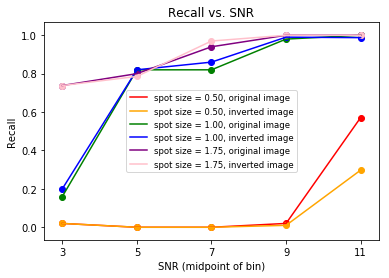

In [18]:
plt.scatter(snr_list, detection_lists_0_5[0], color='red')
plt.plot(snr_list, detection_lists_0_5[0], color='red')
plt.scatter(snr_list, detection_lists_0_5[1], color='orange')
plt.plot(snr_list, detection_lists_0_5[1], color='orange')

plt.scatter(snr_list, detection_lists_1_0[0], color='green')
plt.plot(snr_list, detection_lists_1_0[0], color='green')
plt.scatter(snr_list, detection_lists_1_0[1], color='blue')
plt.plot(snr_list, detection_lists_1_0[1], color='blue')

plt.scatter(snr_list, detection_lists_1_75[0], color='purple')
plt.plot(snr_list, detection_lists_1_75[0], color='purple')
plt.scatter(snr_list, detection_lists_1_75[1], color='pink')
plt.plot(snr_list, detection_lists_1_75[1], color='pink')

e1 = Line2D([0],[0], color='red', label='spot size = 0.50, original image')
e2 = Line2D([0],[0], color='orange', label='spot size = 0.50, inverted image')
e3 = Line2D([0],[0], color='green', label='spot size = 1.00, original image')
e4 = Line2D([0],[0], color='blue', label='spot size = 1.00, inverted image')
e5 = Line2D([0],[0], color='purple', label='spot size = 1.75, original image')
e6 = Line2D([0],[0], color='pink', label='spot size = 1.75, inverted image')
plt.legend(handles=[e1, e2, e3, e4, e5, e6], loc='center', prop={'size': 8.5})
plt.xticks(range(3, 12, 2))
plt.xlabel('SNR (midpoint of bin)')
plt.ylabel('Recall')
plt.title('Recall vs. SNR')
plt.savefig("recall_vs_snr.pdf", transparent=True, bbox_inches="tight")

plt.show()